# Clique Finding Algorithms

## Iterative algorithm using dominating set

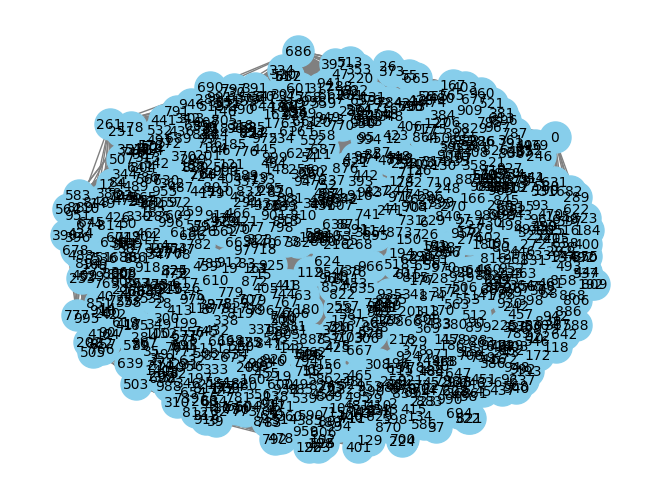

depth of search : 0
Checking node 518:
Subgraph nodes: [0, 518, 11, 528, 17, 18, 21, 23, 24, 27, 543, 32, 35, 37, 549, 42, 555, 556, 557, 558, 559, 48, 564, 565, 569, 570, 574, 63, 64, 578, 68, 580, 71, 584, 590, 79, 592, 82, 83, 597, 87, 607, 612, 102, 103, 104, 105, 106, 614, 619, 623, 114, 626, 630, 121, 128, 644, 645, 649, 138, 139, 651, 653, 144, 657, 659, 150, 153, 156, 160, 161, 162, 163, 164, 672, 166, 679, 168, 684, 174, 175, 686, 178, 180, 181, 697, 700, 190, 192, 705, 707, 710, 711, 202, 718, 208, 722, 213, 726, 215, 728, 217, 729, 220, 732, 739, 740, 744, 751, 753, 754, 761, 251, 254, 257, 258, 260, 261, 265, 267, 780, 269, 783, 787, 788, 277, 789, 279, 793, 796, 287, 288, 804, 302, 313, 315, 316, 317, 319, 834, 836, 325, 327, 844, 333, 339, 343, 857, 346, 858, 348, 350, 864, 866, 867, 872, 366, 879, 369, 372, 373, 384, 897, 899, 388, 393, 906, 396, 404, 917, 920, 409, 923, 414, 926, 417, 930, 932, 933, 425, 426, 937, 430, 434, 947, 948, 437, 439, 955, 444, 445, 446, 958, 9

In [20]:
import matplotlib.pyplot as plt
import networkx as nx


removed_nodes = [] 



def DS(B, processed_nodes):
    """
    Finds a dominating set using the largest degree first method,
    excluding processed nodes from the dominating set.
    """
    if len(B.nodes) == 0:  # Base case: Empty graph
        return {}
    # Check if all nodes are processed
    
    # Compute degrees and sort nodes by degree in descending order
    neighbournum = {node: len(list(B.neighbors(node))) for node in B.nodes}
    nsorted_indices = sorted(neighbournum.keys(), key=lambda x: neighbournum[x], reverse=True)
    
    ndominating_set = set()
    ncovered_nodes = set()
    
    for node in nsorted_indices:
        if node not in processed_nodes and node not in ncovered_nodes:
            ndominating_set.add(node)
            ncovered_nodes.add(node)
            ncovered_nodes.update(B.neighbors(node))

    return ndominating_set

def recursive_clique_detection(B, cliques, processed_nodes=set(), depth=0, max_depth=10):
    """
    Recursively finds cliques in the graph B.
    If a subgraph is not a clique, recursively check its neighbors.
    Stores found cliques in `cliques` list.
    """
    
    global removed_nodes
    
    
    if depth > max_depth:
        print(f"maximum depth reached")
    
    if depth > max_depth or len(B.nodes) == 0:
        return  # Stop recursion if depth exceeds max_depth or graph is empty

    # Step 1: Find the dominating set, excluding processed nodes
    dominating_set = DS(B, processed_nodes)

    
    for v in dominating_set:
               
        # Step 2: For each node v in the dominating set, take the subgraph of neighbors around it
        neighbors = list(B.neighbors(v))
        subgraph_nodes = neighbors + [v]
        subgraph = B.subgraph(subgraph_nodes).copy()  # Create subgraph around v
        
        n_nodes = len(subgraph.nodes)  # Number of nodes in the subgraph
        expected_edges = (n_nodes * (n_nodes - 1)) // 2  # Expected number of edges for a clique
        actual_edges = subgraph.number_of_edges()
        removed_nodes[:] = removed_nodes[:depth]  # Truncate to current depth
        print(f"depth of search : {depth}")
        print(f"Checking node {v}:")
        print(f"Subgraph nodes: {subgraph.nodes}")
        print(f"Expected edges: {expected_edges}, Actual edges: {actual_edges}")
        
        # Check if the subgraph is large enough and contains the correct number of edges to form a clique
        if actual_edges == expected_edges:
            # Step 4: If it's a clique, store it
            print(f"Clique found: {list(subgraph.nodes)}")
            cliques.append(list(subgraph.nodes))
            processed_nodes.add(v)  # Mark all nodes in the clique as processed
            # Add the last removed node to this newly found clique (if any exist)
            cliques[-1].extend(removed_nodes)  # Add it to the last found clique
            print(f"Added last removed node {removed_nodes} to the clique {cliques[-1]}")

        
        else:

            # Add the center node to the last clique found (if any)
            #if cliques:
            #   cliques[-1].append(v)  # Add v to the last clique
            # Step 5: If not a clique, recursively process the subgraph without the center node
            #processed_nodes.add(v)  # Add the center node v to the processed nodes
            removed_nodes.append(v)
            subgraph_nodes.remove(v)  # Remove the center node from the subgraph nodes
            print(f"node number {v} is removed")
            # Create new subgraph excluding the center node v
            new_subgraph = subgraph.subgraph(subgraph_nodes).copy()
            # If the new subgraph has no edges but has nodes, consider those as singleton cliques
            # Check for isolated nodes in the new subgraph (nodes with no edges)
            isolated_nodes = [n for n in new_subgraph.nodes() if new_subgraph.degree(n) == 0]
            
            if isolated_nodes:
                for n in isolated_nodes:
                    print(f"Node {n} is isolated — treated as its own clique.")
                    cliques.append([n])  # Add isolated node as a clique
                    processed_nodes.add(n)  # Mark the isolated node as processed
                    # Add the last removed node to this newly found clique (if any exist)
                    cliques[-1].extend(removed_nodes)  # Add it to the last found clique
                    print(f"Added last removed node {removed_nodes} to the clique {cliques[-1]}")

            if all(n in processed_nodes for n in new_subgraph.nodes()):
                print(" All nodes in the new subgraph are already processed. Building a clique from removed_nodes.")
                if removed_nodes:
                    cliques.append(list(removed_nodes))  # Use removed_nodes as a fallback clique
                    print(f"Formed clique from removed_nodes: {cliques[-1]}")
            
            recursive_clique_detection(new_subgraph, cliques, processed_nodes, depth + 1, max_depth)

            
def check_cliques(graph, cliques):
    """Check if all cliques are valid and that all nodes are covered."""
    all_nodes = set(graph.nodes())
    covered_nodes = set()
    
    # Check if each clique is valid (i.e., all pairs of nodes in the clique are connected)
    for i, clique in enumerate(cliques):
        #print(f"Checking clique {i+1}: {clique}")
        for u in clique:
            for v in clique:
                if u != v and not graph.has_edge(u, v):
                    print(f"Error: in clique number {i+1} Nodes {u} and {v} are not connected, so it's not a valid clique.")
                    return False

        # Add the nodes of this clique to the covered nodes
        covered_nodes.update(clique)

    # Check if all nodes are covered
    if covered_nodes == all_nodes:
        print("All nodes are covered by the cliques.")
        return True
    else:
        print(f"Some nodes are not covered. Missing nodes: {all_nodes - covered_nodes}")
        return False

# Example usage:
B = nx.erdos_renyi_graph(1000, 0.2, seed=42)  # Generate a random graph
# Draw the main graph
nx.draw(B, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
plt.show()
cliques = []  # Store detected cliques
recursive_clique_detection(B, cliques)

# Print all found cliques at the end
print("\nAll detected cliques:")
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")


# Check if the cliques are valid and if all nodes are covered
if check_cliques(B,cliques):
    print("The cliques are valid and cover the entire graph.")
else:
    print("There was an error with the cliques or coverage.")

Find Clique 3

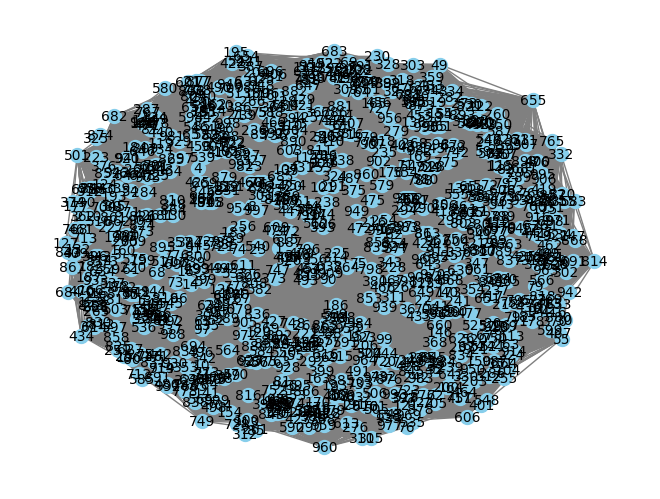

number of cliques found is 30976

All detected cliques:
Clique 1: [999]
Clique 2: [104, 506]
Clique 3: [971]
Clique 4: [508]
Clique 5: [471]
Clique 6: [32]
Clique 7: [729]
Clique 8: [506]
Clique 9: [319]
Clique 10: [163, 980]
Clique 11: [780]
Clique 12: [181]
Clique 13: [751]
Clique 14: [780]
Clique 15: [751, 471]
Clique 16: [804]
Clique 17: [651]
Clique 18: [980]
Clique 19: [751, 24]
Clique 20: [163]
Clique 21: [651]
Clique 22: [651]
Clique 23: [780]
Clique 24: [971]
Clique 25: [163, 980]
Clique 26: [651]
Clique 27: [181]
Clique 28: [471]
Clique 29: [24]
Clique 30: [163]
Clique 31: [971]
Clique 32: [697]
Clique 33: [879]
Clique 34: [697]
Clique 35: [437]
Clique 36: [999]
Clique 37: [961]
Clique 38: [985]
Clique 39: [729]
Clique 40: [164]
Clique 41: [471, 444]
Clique 42: [999]
Clique 43: [444, 879]
Clique 44: [163, 623]
Clique 45: [506]
Clique 46: [729]
Clique 47: [163, 164]
Clique 48: [508]
Clique 49: [569]
Clique 50: [437]
Clique 51: [23, 697]
Clique 52: [980, 23]
Clique 53: [569, 96

In [19]:
#find cliques without removing nodes
import matplotlib.pyplot as plt
import networkx as nx

def find_cliques3(graph, center_node=None, max_depth=10, min_size=1):
    """
    Recursively finds cliques in the neighborhood of the given center node.
    Returns a list of cliques (each a list of node indices), allowing overlapping cliques.
    """
    cliques = []

    def DS(A):
        """Simple dominating set heuristic based on degree."""
        neighbournum = {node: len(list(A.neighbors(node))) for node in A.nodes}
        nsorted_indices = sorted(neighbournum.keys(), key=lambda x: neighbournum[x], reverse=True)
        ndominating_set = set()
        ncovered_nodes = set()
        for node in nsorted_indices:
            if node not in ncovered_nodes:
                ndominating_set.add(node)
                ncovered_nodes.add(node)
                ncovered_nodes.update(A.neighbors(node))
        return ndominating_set

    def recursive_clique_detection(B, depth):
        if depth > max_depth or len(B.nodes) == 0:
            print(f"maximum depth reached")
            return
        dominating_set = DS(B)
        if dominating_set is None:
            print(f"there is no dominating set")
        #print(f"dominating set has length",len(dominating_set))
        for v in dominating_set:
            neighbors = list(B.neighbors(v))
            subgraph_nodes = neighbors + [v]
            subgraph = B.subgraph(subgraph_nodes).copy()
            n = len(subgraph.nodes)
            expected_edges = (n * (n - 1)) // 2
            actual_edges = subgraph.number_of_edges()

            if actual_edges == expected_edges:
                clique = list(subgraph.nodes)
                if len(clique) >= min_size:
                    cliques.append(clique)
            else:
                if v in subgraph_nodes:
                    subgraph_nodes.remove(v)
                new_subgraph = subgraph.subgraph(subgraph_nodes).copy()
                recursive_clique_detection(new_subgraph, depth + 1)

    # Limit scope to center_node's neighborhood, or use full graph
    if center_node is not None:
        if center_node not in graph:
            return []
        neighborhood_nodes = list(graph.neighbors(center_node)) + [center_node]
        subgraph = graph.subgraph(neighborhood_nodes).copy()
    else:
        subgraph = graph.copy()

    recursive_clique_detection(subgraph, 0)
    return cliques


def check_cliques(graph, cliques):
    """Check if all cliques are valid and that all nodes are covered."""
    all_nodes = set(graph.nodes())
    covered_nodes = set()
    
    # Check if each clique is valid (i.e., all pairs of nodes in the clique are connected)
    for i, clique in enumerate(cliques):
        #print(f"Checking clique {i+1}: {clique}")
        for u in clique:
            for v in clique:
                if u != v and not graph.has_edge(u, v):
                    print(f"Error: in clique number {i+1} Nodes {u} and {v} are not connected, so it's not a valid clique.")
                    return False

        # Add the nodes of this clique to the covered nodes
        covered_nodes.update(clique)

    # Check if all nodes are covered
    if covered_nodes == all_nodes:
        print("All nodes are covered by the cliques.")
        return True
    else:
        print(f"Some nodes are not covered. Missing nodes: {all_nodes - covered_nodes}")
        return False

# Example usage:
C = nx.erdos_renyi_graph(1000, 0.2, seed=42)  # Generate a random graph
# Draw the main graph
nx.draw(C, with_labels=True, node_color='skyblue', edge_color='gray', node_size=100, font_size=10)
plt.show()
cliques = []  # Store detected cliques
cliques = find_cliques3(C)
# Print all found cliques at the end
print("number of cliques found is",len(cliques))
print("\nAll detected cliques:")
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")


# Check if the cliques are valid and if all nodes are covered
if check_cliques(C,cliques):
    print("The cliques are valid and cover the entire graph.")
else:
    print("There was an error with the cliques or coverage.")

## Greedy algorithm for finding cliques


Clique Cover (Approximate):
Clique 1: [37, 85, 34, 39, 73]
Clique 2: [79, 63, 43, 93, 95, 13, 40]
Clique 3: [0, 42, 71, 76, 96, 90]
Clique 4: [45, 30, 50, 32, 83, 92]
Clique 5: [94, 22, 80, 16]
Clique 6: [61, 77, 78, 66, 33]
Clique 7: [56, 24, 12, 28, 62]
Clique 8: [69, 14, 18, 51, 7]
Clique 9: [87, 15, 3, 41]
Clique 10: [25, 89, 81, 82, 88]
Clique 11: [84, 67, 6, 54]
Clique 12: [36, 27, 48]
Clique 13: [57, 65, 31, 5]
Clique 14: [59, 72, 49, 17]
Clique 15: [58, 20, 26]
Clique 16: [52, 86, 75, 44]
Clique 17: [9, 99, 19]
Clique 18: [46, 35, 97]
Clique 19: [29, 4, 74]
Clique 20: [53, 2, 64]
Clique 21: [55, 10, 70]
Clique 22: [91, 1]
Clique 23: [21, 38]
Clique 24: [60, 8]
Clique 25: [23, 68]
Clique 26: [11]
Clique 27: [47]
Clique 28: [98]


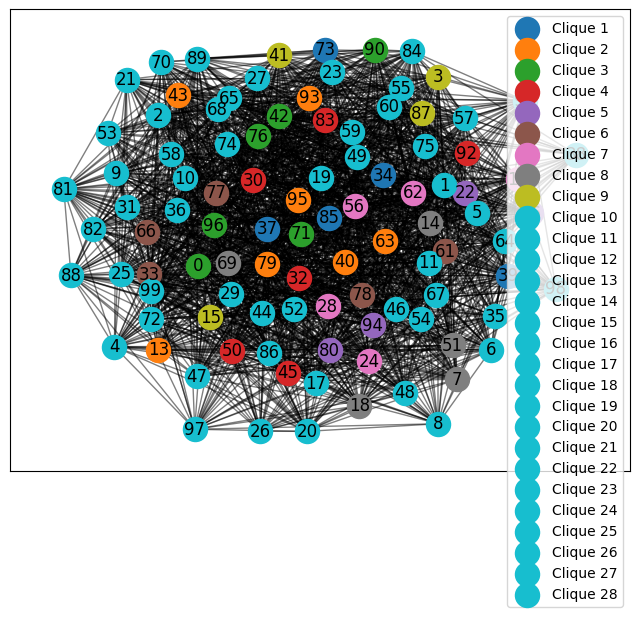

All nodes are covered by the cliques.
The cliques are valid and cover the entire graph.


In [32]:
import networkx as nx
import matplotlib.pyplot as plt

def greedy_clique(B):
    """Finds a single large clique using a greedy approach."""
    nodes = sorted(B.nodes(), key=lambda x: len(list(B.neighbors(x))), reverse=True)
    clique = []
    
    for node in nodes:
        if all(B.has_edge(node, neighbor) for neighbor in clique):
            clique.append(node)
    
    return clique

def greedy_clique_cover(B):
    """Finds a set of large cliques that approximately cover the entire graph."""
    G = B.copy()  # Work on a copy to avoid modifying the original graph
    cliques = []
    
    while G.number_of_nodes() > 0:
        clique =  (G)
        cliques.append(clique)
        G.remove_nodes_from(clique)  # Remove the found clique from the graph
    
    return cliques


def check_cliques(graph, cliques):
    """Check if all cliques are valid and that all nodes are covered."""
    all_nodes = set(graph.nodes())
    covered_nodes = set()
    
    # Check if each clique is valid (i.e., all pairs of nodes in the clique are connected)
    for i, clique in enumerate(cliques):
        #print(f"Checking clique {i+1}: {clique}")
        for u in clique:
            for v in clique:
                if u != v and not graph.has_edge(u, v):
                    print(f"Error: Nodes {u} and {v} are not connected, so it's not a valid clique.")
                    return False

        # Add the nodes of this clique to the covered nodes
        covered_nodes.update(clique)

    # Check if all nodes are covered
    if covered_nodes == all_nodes:
        print("All nodes are covered by the cliques.")
        return True
    else:
        print(f"Some nodes are not covered. Missing nodes: {all_nodes - covered_nodes}")
        return False


# Generate a random graph
B = nx.erdos_renyi_graph(100, 0.4, seed=42)

# Find the clique cover
clique_cover = greedy_clique_cover(B)

# Print the cliques
print("\nClique Cover (Approximate):")
for i, clique in enumerate(clique_cover):
    print(f"Clique {i+1}: {clique}")

# Visualize the graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(B)
colors = [plt.cm.tab10(i) for i in range(len(clique_cover))]

for i, clique in enumerate(clique_cover):
    nx.draw_networkx_nodes(B, pos, nodelist=clique, node_color=[colors[i]], label=f'Clique {i+1}')
nx.draw_networkx_edges(B, pos, alpha=0.5)
nx.draw_networkx_labels(B, pos)
plt.legend()
plt.show()


# Check if the cliques are valid and if all nodes are covered
if check_cliques(B, clique_cover):
    print("The cliques are valid and cover the entire graph.")
else:
    print("There was an error with the cliques or coverage.")

## Greedy algorithm for finding cliques (node weights and node degrees based)


Clique Cover (Approximate):
Clique 1: [37, 85, 34, 39, 90] | Total Weight: 24
Clique 2: [79, 63, 93, 94, 22, 44, 36] | Total Weight: 39
Clique 3: [0, 45, 95, 80, 20, 4] | Total Weight: 35
Clique 4: [30, 73, 25, 61, 52] | Total Weight: 27
Clique 5: [42, 87, 57, 14, 76] | Total Weight: 23
Clique 6: [77, 78, 49, 69, 13] | Total Weight: 30
Clique 7: [32, 50, 12, 59, 48] | Total Weight: 13
Clique 8: [65, 3, 15, 96] | Total Weight: 22
Clique 9: [86, 43, 66, 72] | Total Weight: 20
Clique 10: [24, 62, 56, 2] | Total Weight: 21
Clique 11: [67, 71, 92, 58] | Total Weight: 19
Clique 12: [51, 54, 6, 47, 26] | Total Weight: 28
Clique 13: [41, 89, 82, 31] | Total Weight: 23
Clique 14: [84, 33, 9] | Total Weight: 18
Clique 15: [40, 17, 29, 99] | Total Weight: 26
Clique 16: [46, 18, 16] | Total Weight: 12
Clique 17: [64, 23, 5] | Total Weight: 15
Clique 18: [83, 75, 28] | Total Weight: 8
Clique 19: [97, 19] | Total Weight: 12
Clique 20: [91, 27, 1] | Total Weight: 12
Clique 21: [74, 81] | Total Weigh

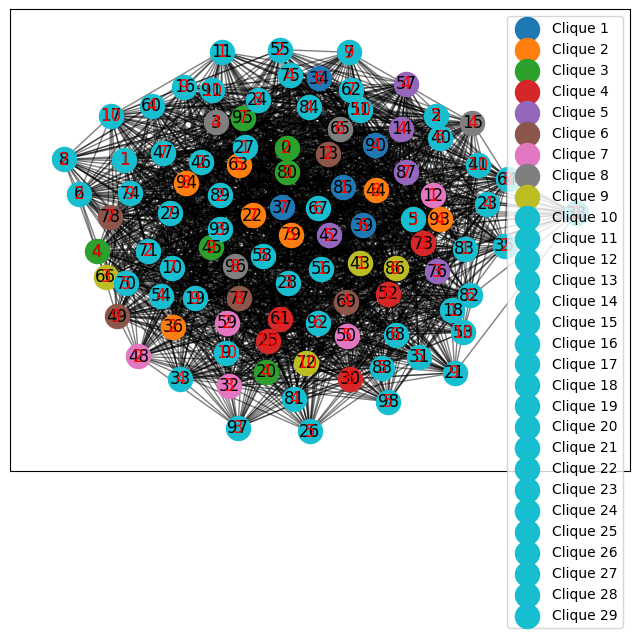

All nodes are covered by the cliques.
The cliques are valid and cover the entire graph.


In [19]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

def generate_weighted_graph(n, p, seed=42):
    """Generates an Erdős–Rényi graph with weighted nodes."""
    random.seed(seed)
    G = nx.erdos_renyi_graph(n, p, seed=seed)

    # Assign random weights to nodes
    for node in G.nodes():
        G.nodes[node]['weight'] = random.randint(1, 10)

    return G

def greedy_clique_weighted(G,alpha,beta):
    """Finds a single large clique using a greedy approach based on node weights."""

    #maximum degree for normalization purpose
    # Compute max degree to normalize
    #max_degree = max(dict(G.degree()).values())  # Get the highest degree in the graph

    # Ensure we don't divide by zero (in case of an isolated node)
    #if max_degree == 0:
    #    max_degree = 1  
    # Sort nodes by weight (higher first)
    nodes = sorted(G.nodes(), key=lambda x: alpha * np.abs(G.nodes[x]['weight']) + beta * G.degree[x], reverse=True)
    clique = []

    for node in nodes:
        if all(G.has_edge(node, neighbor) for neighbor in clique):
            clique.append(node)

    return clique

def greedy_clique_cover_weighted(G,alpha,beta):
    """Finds a set of large cliques that approximately cover the entire graph."""
    H = G.copy()
    cliques = []

    while H.number_of_nodes() > 0:
        clique = greedy_clique_weighted(H,alpha,beta)
        cliques.append(clique)
        H.remove_nodes_from(clique)  # Remove the found clique from the graph

    return cliques

def check_cliques_weighted(graph, cliques):
    """Check if all cliques are valid and that all nodes are covered."""
    all_nodes = set(graph.nodes())
    covered_nodes = set()
    
    for i, clique in enumerate(cliques):
        for u in clique:
            for v in clique:
                if u != v and not graph.has_edge(u, v):
                    print(f"Error: Nodes {u} and {v} are not connected, so it's not a valid clique.")
                    return False
        covered_nodes.update(clique)

    if covered_nodes == all_nodes:
        print("All nodes are covered by the cliques.")
        return True
    else:
        print(f"Some nodes are not covered. Missing nodes: {all_nodes - covered_nodes}")
        return False

# Generate a weighted graph
G = generate_weighted_graph(100, 0.4)


# Show the importance of weight and degree
alpha = 0.1
beta = 0.9

# Find the clique cover
clique_cover = greedy_clique_cover_weighted(G,alpha,beta)

# Print the cliques
print("\nClique Cover (Approximate):")
for i, clique in enumerate(clique_cover):
    clique_weight = sum(G.nodes[node]['weight'] for node in clique)
    print(f"Clique {i+1}: {clique} | Total Weight: {clique_weight}")

# Visualize the weighted graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
colors = [plt.cm.tab10(i) for i in range(len(clique_cover))]

for i, clique in enumerate(clique_cover):
    nx.draw_networkx_nodes(G, pos, nodelist=clique, node_color=[colors[i]], label=f'Clique {i+1}')
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

# Display node weights
node_labels = {node: G.nodes[node]['weight'] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='red')

plt.legend()
plt.show()

# Check if the cliques are valid and if all nodes are covered
if check_cliques_weighted(G, clique_cover):
    print("The cliques are valid and cover the entire graph.")
else:
    print("There was an error with the cliques or coverage.")


## Greedy algorithm for finding cliques (adaptive)


Clique Cover (Approximate):
Clique 1: [25, 17, 72, 33, 66, 89] | Total Weight: 39
Clique 2: [51, 45, 74, 7, 24, 78, 4] | Total Weight: 56
Clique 3: [80, 9, 49, 19, 22] | Total Weight: 44
Clique 4: [41, 44, 16, 95, 79] | Total Weight: 39
Clique 5: [53, 91, 77, 87, 92] | Total Weight: 41
Clique 6: [96, 10, 62, 30, 71] | Total Weight: 30
Clique 7: [94, 64, 34, 67, 39, 18] | Total Weight: 35
Clique 8: [21, 37, 65, 15, 85, 27] | Total Weight: 28
Clique 9: [29, 47, 40, 43] | Total Weight: 21
Clique 10: [52, 86, 63, 69, 1] | Total Weight: 22
Clique 11: [82, 50, 2, 81] | Total Weight: 20
Clique 12: [68, 31, 93] | Total Weight: 15
Clique 13: [42, 26, 32, 99] | Total Weight: 16
Clique 14: [70, 88, 35] | Total Weight: 12
Clique 15: [98, 14, 28, 61] | Total Weight: 14
Clique 16: [58, 23, 76] | Total Weight: 12
Clique 17: [84, 57, 90, 55, 83] | Total Weight: 15
Clique 18: [20, 5, 38] | Total Weight: 9
Clique 19: [3, 54, 46] | Total Weight: 10
Clique 20: [60, 8, 0] | Total Weight: 8
Clique 21: [75,

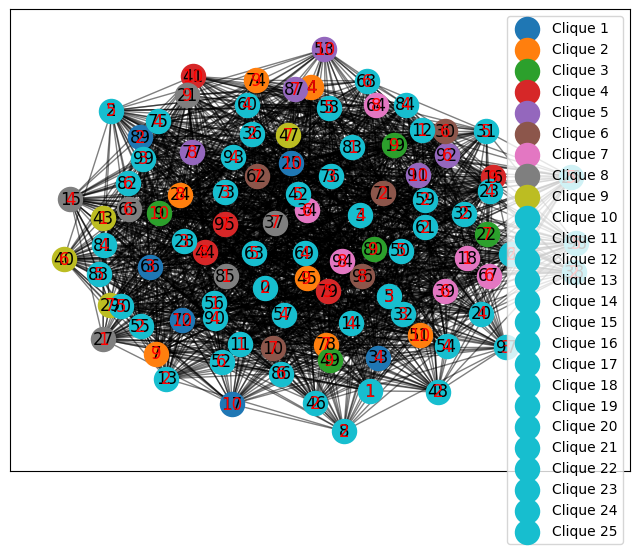

All nodes are covered by the cliques.
The cliques are valid and cover the entire graph.


In [18]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np

def generate_weighted_graph(n, p, seed=42):
    """Generates an Erdős–Rényi graph with weighted nodes."""
    random.seed(seed)
    G = nx.erdos_renyi_graph(n, p, seed=seed)

    # Assign random weights to nodes
    for node in G.nodes():
        G.nodes[node]['weight'] = random.randint(1, 10)

    return G

def greedy_clique_weighted(G,alpha):
    """Finds a single large clique using a greedy approach based on node weights."""

    #maximum degree for normalization purpose
    # Compute max degree to normalize
    #max_degree = max(dict(G.degree()).values())  # Get the highest degree in the graph

    # Ensure we don't divide by zero (in case of an isolated node)
    #if max_degree == 0:
    #    max_degree = 1  
    # Sort nodes by weight (higher first)
    nodes = sorted(G.nodes(), key=lambda x: alpha * np.abs(G.nodes[x]['weight']) + ( 1 - alpha) * sum( 
        np.abs(G.nodes[neighbor]['weight']) * np.abs(G.nodes[x]['weight']) for neighbor in G.neighbors(x)), reverse=True)
    clique = []

    for node in nodes:
        if all(G.has_edge(node, neighbor) for neighbor in clique):
            clique.append(node)

    return clique

def greedy_clique_cover_weighted(G,alpha):
    """Finds a set of large cliques that approximately cover the entire graph."""
    H = G.copy()
    cliques = []

    while H.number_of_nodes() > 0:
        clique = greedy_clique_weighted(H,alpha)
        cliques.append(clique)
        H.remove_nodes_from(clique)  # Remove the found clique from the graph

    return cliques

def check_cliques_weighted(graph, cliques):
    """Check if all cliques are valid and that all nodes are covered."""
    all_nodes = set(graph.nodes())
    covered_nodes = set()
    
    for i, clique in enumerate(cliques):
        for u in clique:
            for v in clique:
                if u != v and not graph.has_edge(u, v):
                    print(f"Error: Nodes {u} and {v} are not connected, so it's not a valid clique.")
                    return False
        covered_nodes.update(clique)

    if covered_nodes == all_nodes:
        print("All nodes are covered by the cliques.")
        return True
    else:
        print(f"Some nodes are not covered. Missing nodes: {all_nodes - covered_nodes}")
        return False

# Generate a weighted graph
G = generate_weighted_graph(100, 0.4)

# total number of shots and step
Nshots = 10000
Nstep = 100

# steep
k = 500

# Show the importance of weight and degree
alpha = 1 - np.exp(-k*Nstep/Nshots)


# Find the clique cover
clique_cover = greedy_clique_cover_weighted(G,alpha)

# Print the cliques
print("\nClique Cover (Approximate):")
for i, clique in enumerate(clique_cover):
    clique_weight = sum(G.nodes[node]['weight'] for node in clique)
    print(f"Clique {i+1}: {clique} | Total Weight: {clique_weight}")

# Visualize the weighted graph
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)
colors = [plt.cm.tab10(i) for i in range(len(clique_cover))]

for i, clique in enumerate(clique_cover):
    nx.draw_networkx_nodes(G, pos, nodelist=clique, node_color=[colors[i]], label=f'Clique {i+1}')
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos)

# Display node weights
node_labels = {node: G.nodes[node]['weight'] for node in G.nodes()}
nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='red')

plt.legend()
plt.show()

# Check if the cliques are valid and if all nodes are covered
if check_cliques_weighted(G, clique_cover):
    print("The cliques are valid and cover the entire graph.")
else:
    print("There was an error with the cliques or coverage.")


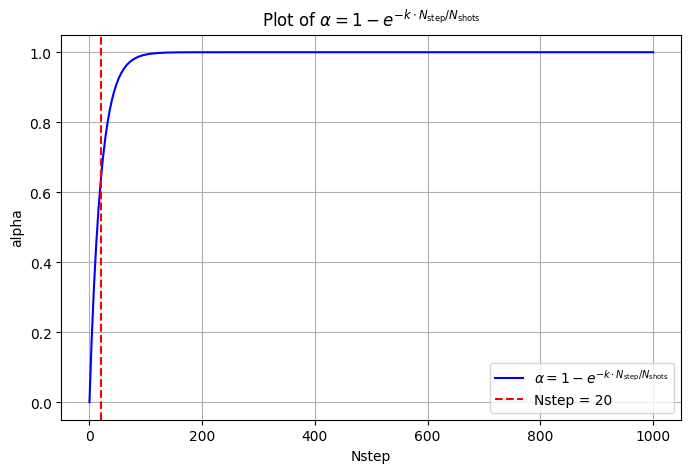

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
k = 500  # You can adjust this constant
Nshots = 10000  # You can adjust this constant

# Define the function
def func(Nstep, k, Nshots):
    return 1 - np.exp(-k * Nstep / Nshots)

# Generate x values
Nstep = np.linspace(0, 1000, 500)  # Nstep ranges from 0 to 1000

# Calculate corresponding y values
y_values = func(Nstep, k, Nshots)

# Plot the function
plt.figure(figsize=(8, 5))
plt.plot(Nstep, y_values, label=r"$\alpha = 1 - e^{-k \cdot N_{\mathrm{step}} / N_{\mathrm{shots}}}$", color='b')
plt.axvline(x=20, color='r', linestyle='--', label="Nstep = 20")  # Optional vertical line at Nstep=20
plt.xlabel('Nstep')
plt.ylabel('alpha')
plt.title(r'Plot of $\alpha = 1 - e^{-k \cdot N_{\mathrm{step}} / N_{\mathrm{shots}}}$')
plt.legend()
plt.grid(True)
plt.show()


## Independent set based algorithm

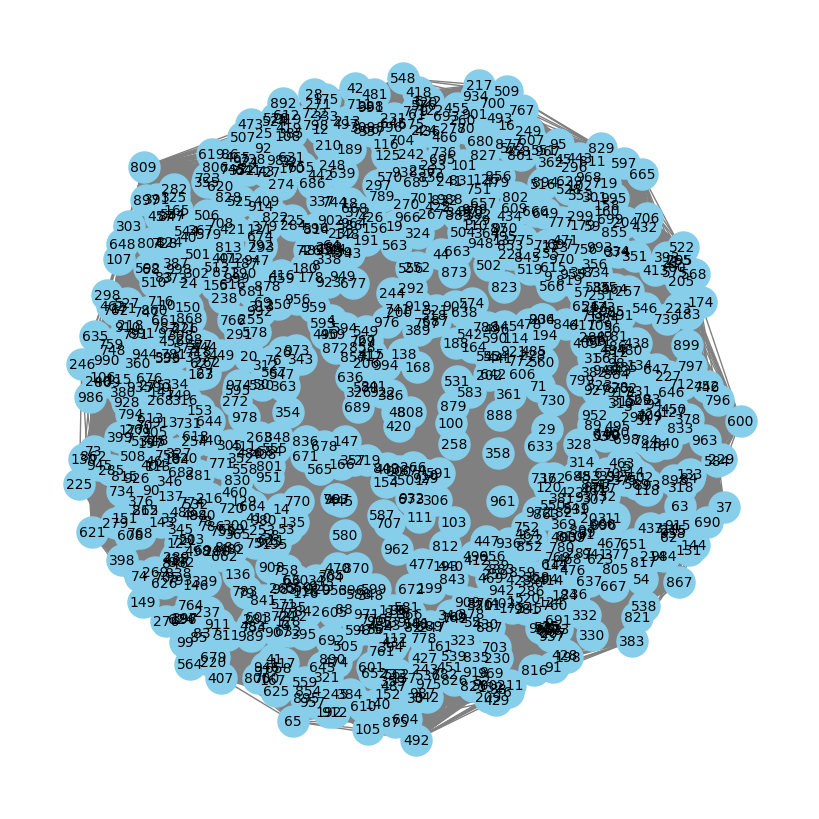

Found 163 clique(s).
Clique 1: {930, 163, 4, 9, 211, 403, 952, 188, 94}
Clique 2: {562, 324, 389, 392, 618, 314, 974}
Clique 3: {708, 550, 134, 872, 112, 888, 59, 382, 959}
Clique 4: {34, 611, 995, 966, 459, 623, 786, 566}
Clique 5: {386, 802, 46, 336, 530, 756, 469, 699, 895}
Clique 6: {704, 743, 777, 364, 688, 306, 726, 154}
Clique 7: {292, 168, 41, 523, 628, 567, 249, 991}
Clique 8: {96, 545, 994, 879, 244, 887, 568, 25}
Clique 9: {384, 929, 162, 369, 849, 615, 24}
Clique 10: {259, 167, 552, 415, 269, 657, 146, 671}
Clique 11: {736, 835, 264, 27, 543, 77, 223}
Clique 12: {592, 517, 53, 583, 408, 890, 108}
Clique 13: {640, 643, 355, 933, 556, 173, 697, 88, 313}
Clique 14: {322, 452, 774, 553, 75, 723, 916, 792, 639}
Clique 15: {416, 417, 116, 955, 375, 426, 235}
Clique 16: {466, 110, 20, 423, 810, 381, 206}
Clique 17: {464, 947, 502, 696, 250, 348, 254}
Clique 18: {997, 363, 861, 48, 82, 664, 923, 380, 477, 799}
Clique 19: {99, 414, 967, 169, 727, 270, 319}
Clique 20: {838, 428, 301,

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

def complement_graph(graph):
    """Returns the complement graph of the given graph."""
    # Create a NetworkX Graph from the adjacency list representation of the complement graph
    complement = nx.Graph()

    # Add all nodes from the original graph to the complement graph
    complement.add_nodes_from(graph.nodes())
    
    # Add edges to the complement graph
    for node in graph.nodes():
        neighbors = set(graph.neighbors(node))
        non_neighbors = set(graph.nodes()) - {node} - neighbors
        for neighbor in non_neighbors:
            complement.add_edge(node, neighbor)

    return complement

def greedy_max_independent_set(graph):
    """Finds an approximate maximum independent set using a greedy strategy."""
    independent_set = set()
    remaining_nodes = set(graph.nodes())

    # Sort nodes by degree (lowest first) to maximize the chance of independence
    sorted_nodes = sorted(remaining_nodes, key=lambda node: len(list(graph.neighbors(node))))

    visited = set()

    for node in sorted_nodes:
        if node not in visited:
            independent_set.add(node)
            visited.update(graph.neighbors(node))  # Mark all neighbors as visited

    return independent_set

def find_cliques(graph):
    """Finds cliques in the graph by finding independent sets in the complement graph."""
    cliques = []
    remaining_graph = graph.copy()

    while len(remaining_graph.nodes()) > 0:  # Ensure we only run if there are remaining nodes
        # Step 1: Build the complement graph for the remaining graph
        complement = complement_graph(remaining_graph)

        # Step 2: Find an independent set in the complement graph (this forms a clique)
        independent_set = greedy_max_independent_set(complement)

        if not independent_set:  # If no independent set is found, break the loop
            break
        
        # Step 3: Convert independent set into a clique in the original graph
        clique = set(independent_set)
        cliques.append(clique)

        # Step 4: Remove the nodes of the found clique from the remaining graph
        for node in clique:
            if node in remaining_graph:
                remaining_graph.remove_node(node)

    return cliques

def check_cliques(graph, cliques):
    """Check if all cliques are valid and that all nodes are covered."""
    all_nodes = set(graph.nodes())
    covered_nodes = set()
    
    # Check if each clique is valid (i.e., all pairs of nodes in the clique are connected)
    for i, clique in enumerate(cliques):
        #print(f"Checking clique {i+1}: {clique}")
        for u in clique:
            for v in clique:
                if u != v and not graph.has_edge(u, v):
                    print(f"Error: Nodes {u} and {v} are not connected, so it's not a valid clique.")
                    return False

        # Add the nodes of this clique to the covered nodes
        covered_nodes.update(clique)

    # Check if all nodes are covered
    if covered_nodes == all_nodes:
        print("All nodes are covered by the cliques.")
        return True
    else:
        print(f"Some nodes are not covered. Missing nodes: {all_nodes - covered_nodes}")
        return False

# Generate a random graph using the Erdős–Rényi model
B = nx.erdos_renyi_graph(1000, 0.4, seed=42)

# Draw the main graph
plt.figure(figsize=(8, 8))
nx.draw(B, with_labels=True, node_color='skyblue', edge_color='gray', node_size=500, font_size=10)
plt.show()

# Find cliques in the graph
cliques = find_cliques(B)

# Output the size of the cliques found
print(f"Found {len(cliques)} clique(s).")

# Print the found cliques
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")

# Check if the cliques are valid and if all nodes are covered
if check_cliques(B, cliques):
    print("The cliques are valid and cover the entire graph.")
else:
    print("There was an error with the cliques or coverage.")


## Bron Kerbosch Algorithm

In [5]:
import networkx as nx

# Generate a random graph
#B = nx.erdos_renyi_graph(15, 0.4, seed=42)
B = nx.Graph()
nodes = [1,2,3,4,5,6,7,8,9,10,11,12,13,13]
B.add_nodes_from(nodes)

# Add all edges (complete graph, all nodes connected)
edges = [(i, j) for i in range(1, 11) for j in range(i+1, 11)]  # All pairs (i, j) where i < j
B.add_edges_from(edges)


# Use NetworkX's built-in Bron-Kerbosch algorithm to find cliques
cliques = list(nx.find_cliques(B))

# Output the maximal cliques
print(f"Found {len(cliques)} maximal cliques:")
for i, clique in enumerate(cliques):
    print(f"Clique {i+1}: {clique}")


# Generate a random graph
#C = nx.erdos_renyi_graph(15, 0.4, seed=42)

# Use NetworkX's built-in Bron-Kerbosch algorithm to find cliques
cliques1 = list(nx.enumerate_all_cliques(B))

# Output the maximal cliques
print(f"Found {len(cliques1)} maximal cliques by enumerate:")
for i, clique in enumerate(cliques1):
    print(f"Clique {i+1}: {clique}")

Found 4 maximal cliques:
Clique 1: [1, 2, 3, 4, 5, 6, 8, 9, 10, 7]
Clique 2: [11]
Clique 3: [12]
Clique 4: [13]
Found 1026 maximal cliques by enumerate:
Clique 1: [1]
Clique 2: [2]
Clique 3: [3]
Clique 4: [4]
Clique 5: [5]
Clique 6: [6]
Clique 7: [7]
Clique 8: [8]
Clique 9: [9]
Clique 10: [10]
Clique 11: [11]
Clique 12: [12]
Clique 13: [13]
Clique 14: [1, 2]
Clique 15: [1, 3]
Clique 16: [1, 4]
Clique 17: [1, 5]
Clique 18: [1, 6]
Clique 19: [1, 7]
Clique 20: [1, 8]
Clique 21: [1, 9]
Clique 22: [1, 10]
Clique 23: [2, 3]
Clique 24: [2, 4]
Clique 25: [2, 5]
Clique 26: [2, 6]
Clique 27: [2, 7]
Clique 28: [2, 8]
Clique 29: [2, 9]
Clique 30: [2, 10]
Clique 31: [3, 4]
Clique 32: [3, 5]
Clique 33: [3, 6]
Clique 34: [3, 7]
Clique 35: [3, 8]
Clique 36: [3, 9]
Clique 37: [3, 10]
Clique 38: [4, 5]
Clique 39: [4, 6]
Clique 40: [4, 7]
Clique 41: [4, 8]
Clique 42: [4, 9]
Clique 43: [4, 10]
Clique 44: [5, 6]
Clique 45: [5, 7]
Clique 46: [5, 8]
Clique 47: [5, 9]
Clique 48: [5, 10]
Clique 49: [6, 7]
Cliq